<a href="https://colab.research.google.com/github/Guilherm0/Clustering/blob/main/KPrototypes%26KmodesPratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
%%capture
%pip install kmodes

In [ ]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [ ]:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    palette='tab10',
    rc={
        'figure.figsize': (12,8),
        'axes.grid': True,
        'grid.alpha': .2,
        'axes.titlesize': 'x-large',
        'axes.titleweight': 'bold',
        'axes.titlepad': 20,
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

# Dataset with mix data

## Dados categóricos

In [ ]:
from yellowbrick.datasets import load_mushroom

In [ ]:
# Load data
df_mushroom = load_mushroom()[0]
df_mushroom

,shape,surface,color
0,convex,smooth,yellow
1,bell,smooth,white
2,convex,scaly,white
3,convex,smooth,gray
4,convex,scaly,yellow
...,...,...,...
8118,knobbed,smooth,brown
8119,convex,smooth,brown
8120,flat,smooth,brown
8121,knobbed,scaly,brown


In [ ]:
# Clustering with KModes
model = KModes(n_clusters=4)
labels = model.fit_predict(df_mushroom)
print(labels)
print(model.cost_)

[0 1 0 ... 1 0 0]
8851.0


In [ ]:
# Avaliando modelo
custos = [KModes(n_clusters=K).fit(df_mushroom).cost_ for K in range(2,11)]
custos

[11560.0, 10343.0, 8851.0, 8111.0, 7203.0, 6708.0, 6416.0, 6190.0, 5882.0]

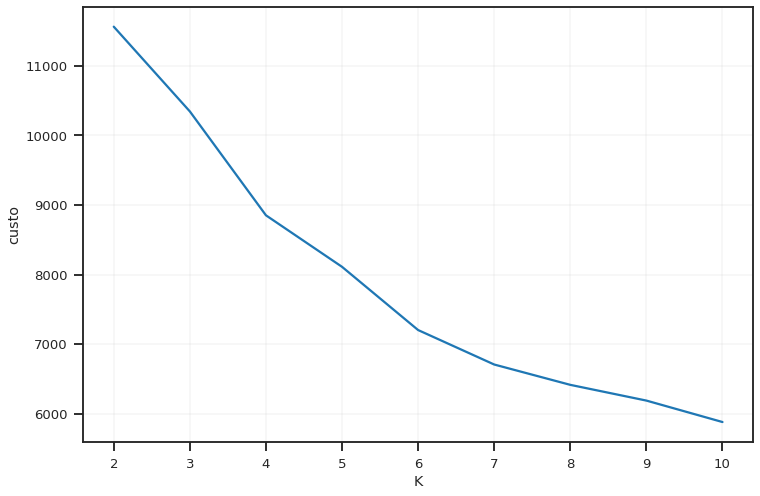

In [ ]:
pd.Series(custos, index=range(2,11)).plot()
plt.xlabel('K')
plt.ylabel('custo')
plt.show()

## Dados mistos

Fonte e dicionário do dataset: [https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

In [ ]:
df_diabetes = pd.read_csv('https://raw.githubusercontent.com/Ekeany/Clustering-Mixed-Data/main/data/heart.csv')
df_diabetes = df_diabetes.drop(columns='target')
df_diabetes

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
# Padroniza dados numéricos
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df_diabetes[numerical_columns] = df_diabetes[numerical_columns].apply(scale)

In [ ]:
# Define posições dos dados categóricos
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_idx = df_diabetes.columns.isin(categorical_columns).nonzero()[0].tolist()

In [ ]:
# Modelagem com KPrototypes
model = KPrototypes()
model.fit(df_diabetes, categorical=categorical_idx)

KPrototypes(gamma=0.5)

In [ ]:
model.predict(df_diabetes, categorical=categorical_idx)

array([0, 1, 1, 2, 2, 5, 2, 1, 5, 5, 2, 2, 2, 7, 5, 1, 2, 0, 1, 5, 5, 1,
       1, 5, 1, 5, 5, 6, 3, 1, 1, 7, 1, 2, 6, 1, 2, 5, 5, 3, 2, 2, 6, 2,
       2, 2, 1, 2, 6, 2, 2, 7, 0, 1, 5, 1, 1, 2, 1, 2, 7, 2, 1, 1, 5, 1,
       6, 1, 1, 7, 2, 7, 1, 2, 1, 2, 2, 5, 1, 7, 1, 2, 7, 2, 6, 3, 7, 1,
       7, 7, 1, 5, 1, 2, 1, 6, 3, 7, 2, 2, 1, 0, 5, 1, 1, 7, 5, 2, 1, 2,
       3, 5, 5, 1, 2, 1, 1, 6, 1, 2, 4, 2, 1, 2, 1, 1, 1, 5, 1, 7, 5, 2,
       2, 1, 2, 2, 7, 7, 6, 4, 2, 2, 1, 7, 5, 5, 1, 5, 1, 1, 0, 7, 5, 5,
       1, 7, 1, 1, 7, 2, 2, 2, 1, 1, 1, 4, 0, 0, 0, 0, 2, 1, 2, 0, 0, 6,
       7, 2, 6, 4, 4, 4, 2, 0, 0, 2, 7, 4, 1, 1, 2, 6, 6, 0, 0, 3, 0, 7,
       4, 7, 1, 0, 4, 3, 0, 2, 6, 0, 6, 5, 7, 0, 6, 3, 6, 3, 4, 4, 0, 2,
       3, 0, 2, 3, 6, 0, 4, 6, 5, 4, 1, 3, 3, 4, 4, 2, 2, 2, 7, 2, 4, 5,
       0, 4, 6, 2, 3, 5, 5, 0, 0, 6, 4, 7, 5, 2, 0, 6, 5, 1, 5, 7, 4, 7,
       6, 7, 3, 6, 4, 4, 2, 0, 4, 7, 6, 1, 4, 7, 2, 0, 4, 6, 0, 1, 0, 4,
       5, 5, 4, 6, 5, 0, 0, 5, 6, 0, 7, 4, 4, 6, 0,

In [ ]:
# Avaliando modelo
model.cost_

1056.8976344488635

In [ ]:
# Avaliando modelo
custos = [
    KPrototypes(K).fit(df_diabetes, categorical=categorical_idx).cost_
    for K in range(2,11)
    ]
custos

[1566.2403908950237,
 1401.6822323513516,
 1297.1104292766374,
 1207.0685702439155,
 1147.0796713754228,
 1097.9354201474093,
 1052.8789326323583,
 1020.0912931889748,
 979.3579317115184]

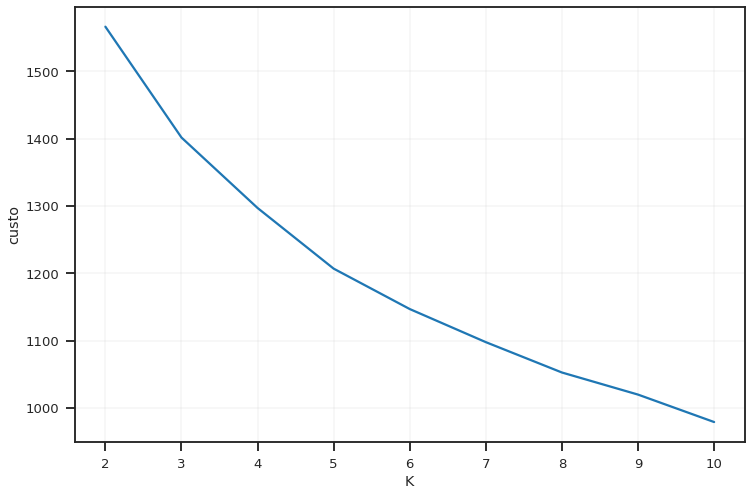

In [ ]:
pd.Series(custos, index=range(2,11)).plot()
plt.xlabel('K')
plt.ylabel('custo')
plt.show()